In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%pylab nbagg

## Linear regression with one independent variable

### Simple linear regression
A simple linear regression uses the ordinary least squares method to determine a linear function that *predicts* the relationship  between a dependant (usually y) and independent (usually x) variable:  <div align="center"> $y_i = mx_i + \epsilon_i$ </div>

The best fit is the fit (line) such that $\sum \epsilon_i^2 = \sum (y_i - mx_i - b)^2$, or using the more typical notation for statistics, $\sum \epsilon_i^2 = \sum (y_i - \beta x_i - \alpha)^2$, is minimized. This is solved by taking the partial derivitaves of the RHS wrt $\beta$ and $\alpha$ and of course setting this to 0. One can obtain* $\beta = (\sum x_i - \bar{x})(\sum y_i - \bar{y})/\sum (x_i -\bar{x})^2$ and $\alpha = \bar{y} -\beta \bar{x}$.
*Note: If you do the algebra and get stuck see step 8 on this link http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf

If the errors are gaussian, the least squares solution is the maximum likelihood estimate. 

In [109]:
def slr(x,y):
    if type(x) == list:
        x = array(x)
    if type(y) == list:
        y = array(y)
    ybar = np.mean(y)
    xbar = np.mean(x)
    beta = np.sum((x-xbar)*(y-ybar))/np.sum((x-xbar)**2)
    alpha = ybar - beta*xbar
    liney = beta*x + alpha

    betaSTD = 
    return(liney)

In [113]:
slr(fakex,fakey)

3.455329734920169

[4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00 9.23385948e-01 1.86260211e+00 3.45560727e+00
 3.96767474e+00 5.38816734e+00 4.19194514e+00 6.85219500e+00
 2.04452250e+00 8.78117436e+00 2.73875932e-01 6.70467510e+00
 4.17304802e+00 5.58689828e+00 1.40386939e+00 1.98101489e+00
 8.00744569e+00 9.68261576e+00 3.13424178e+00 6.92322616e+00
 8.76389152e+00 8.94606664e+00 8.50442114e-01 3.90547832e-01
 1.69830420e+00 8.78142503e+00 9.83468338e-01 4.21107625e+00
 9.57889530e+00 5.33165285e+00 6.91877114e+00 3.15515631e+00
 6.86500928e+00 8.34625672e+00 1.82882773e-01 7.50144315e+00
 9.88861089e+00 7.48165654e+00 2.80443992e+00 7.89279328e+00
 1.03226007e+00 4.47893526e+00 9.08595503e+00 2.93614148e+00
 2.87775339e+00 1.30028572e+00]


In [111]:
#Try it on some data. I am using global temperature data from https://datahub.io/core/global-temp#data
year, tempa = np.loadtxt('./data/annual_csv.csv', skiprows=1, delimiter=",", usecols=(1,2), unpack=True)
year = np.array([int(y) for y in year]); tempa=np.array(tempa)
month = np.loadtxt('./data/monthly_csv.csv', skiprows=1, delimiter=",", usecols=(1), unpack=True, dtype=str)

rng = np.random.RandomState(1)
fakex = 10 * rng.rand(50)
fakey = 2 * fakex - 5 + rng.randn(50)

<class 'numpy.ndarray'>


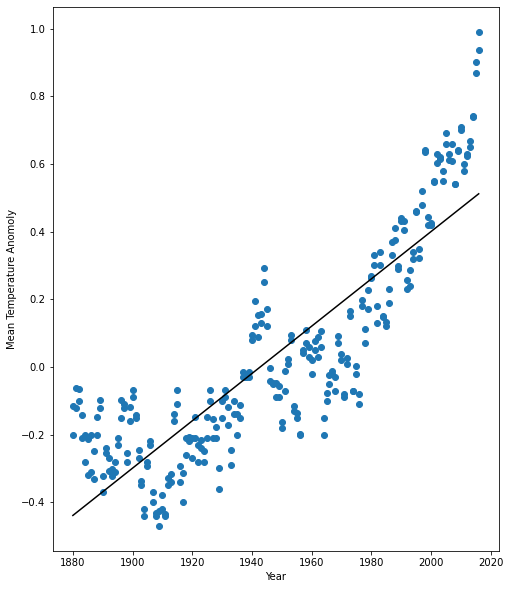

In [114]:
plt.figure(figsize=(8,10))
plt.scatter(year,tempa)
plt.plot(year, slr(year,tempa), c='k')
plt.savefig('test.png')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomoly')
plt.show()
plt.close()

In [ ]:
To generalize this, one can express this as a matrix equation as well. $\boldsymbol{Y} =\boldsymbol{ \beta X} + \boldsymbol{\epsilon}$
